# Trabalho de Conclusão de Curso - TCC
### Turma - DSA T212
### Aluno : Drausio Gomes dos Santos
### Orientadora: Gabrielle Maria Romeiro Lombardi
### Tema: Construção e uso de modelos de grafos para representação e análise da estrutura organizacional da administração pública federal.
## Resultados Preliminares

### Etapa 4: Construção dos Grafos
<p> Construção das representações de estruturas organizacionais em grafos.</p>

#### Importando as bibliotecas

In [1]:
!pip install igraph
!pip install pycairo
!pip install cairocffi
!pip install python-igraph

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import time
import datetime as dt
from datetime import datetime
import pickle
import igraph as ig
from igraph import *
print("igraph-version : ",ig.__version__)
import cairo
import pandas as pd
import pytz

class Main:     
    def show_current_time(self):
        ini = time.time()
        tz_SP = pytz.timezone('America/Sao_Paulo') 
        now = datetime.now(tz_SP)
        current_time = now.strftime("%d/%m/%Y %H:%M:%S")
        print("Current Time =", current_time)  

main = Main()
    


igraph-version :  0.10.1


#### Criando data frames para cada ano

In [3]:
anos = [2019,2020,2021,2022]
base_path = "C:/projetos/tcc_dsa_usp_esalq/"
listaAno=[]    
for ano in anos:
    anoRef = str(ano)
    listaAno.append({"ano":ano, "df": pd.read_csv(base_path + "dados/dou/" + anoRef + "/" + anoRef +".csv") })
    listaAno[ano - 2019]["df"]["entidades"] = listaAno[ano - 2019]["df"]["emissor"].str.split("/")

#### Montando os grafos direcionados por Ano utlizando IGraph

In [4]:
print("Início da criação dos grafos anuais.")    
main.show_current_time()
print("------------------------------------") 
for ano in anos:
    amostra = 100 #80000
    g = ig.Graph(directed=True)
    contador_vertices = 0
    contador_arestas = 0
    g["name"]="Unidades Organizacionais da Administração Pública - " + str(ano)
    print(g.is_weighted())
    df_sample = listaAno[ano - 2019]["df"].sample(n=amostra)
    print(len(df_sample))
    for index, row in df_sample.iterrows(): 
        split_data = row["data"].split("/")
        dia = split_data[0]
        mes = split_data[1]
        ano = split_data[2]
        d = dt.date(int(ano),int(mes),int(dia))
        for index,ent in enumerate(row["entidades"]):        
            try:
                vert = g.vs.find(ent) 
                vert["peso"] = vert["peso"] + 1
                if ( d < vert["data_inicio"] ):
                    vert["data_inicio"] = d
                if ( d > vert["data_termino"] ):
                    vert["data_termino"] = d
                vert["tempo_medio"] = (vert["data_termino"] - vert["data_inicio"]) / vert["peso"]
            except:
                if "Ministério da Educação" in row["entidades"]:
                    g.add_vertices([ent])
                    vert = g.vs.find(ent)            
                    vert["data_inicio"] =  d
                    vert["data_termino"] =  d
                    vert["label"]=ent
                    vert["peso"] =  1
                    vert["tempo_medio"]=0.0
                    contador_vertices = contador_vertices + 1
    
        for (index,ent) in enumerate(row['entidades']):
            if len(row['entidades']) > index+1 and "Ministério da Educação" in row['entidades']:
                eg = g.es.select(lambda edge: edge.source_vertex["name"]  == ent and \
                            edge.target_vertex["name"] == row['entidades'][index+1] ) 
                if len(eg) > 0:
                    eg[0]["peso"] = eg[0]["peso"] +  1
                    if ( d < eg[0]["data_inicio"] ):
                        eg[0]["data_inicio"] = d                    
                    if ( d > eg[0]["data_termino"] ):
                        eg[0]["data_termino"] = d
                    eg[0]["tempo_medio"] = (eg[0]["data_termino"] - eg[0]["data_inicio"])\
                    / eg[0]["peso"]
                
                if not (len(eg) > 0):
                    g.add_edges([(ent , row['entidades'][index+1])])
                    eg = g.es.select(lambda edge: edge.source_vertex["name"]  == ent and \
                            edge.target_vertex["name"] == row['entidades'][index+1] ) 
                    eg[0]["data_inicio"] =  d
                    eg[0]["data_termino"] =  d
                    eg[0]["peso"] =  1
                    eg[0]["tempo_medio"]=0.0
                    contador_arestas = contador_arestas + 1        
        print("vertices: " + str(contador_vertices) + " arestas: " + str(contador_arestas), end='\r' )
    #print("vertices: " + str(contador_vertices) + " arestas: " + str(contador_arestas) )
    print(g.summary())
    main.show_current_time()
    for vx in g.vs[:1]:
        #print(vx.attributes())
        print("------------------------------------") 
    for es in g.es[:1]:
        #print(len(g.es), es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())
        print("------------------------------------") 
    with open("grafo"+str(ano)+".pkl", 'wb') as pickle_file:
        pickle.dump(g, pickle_file)
    print("------------------------------------")                 
print("Término da criação dos grafos anuais.")    
main.show_current_time()

Início da criação dos grafos anuais.
Current Time = 10/11/2022 19:02:12
------------------------------------
False
100
IGRAPH DN-- 28 29 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), peso (v), tempo_medio (v), data_inicio (e), data_termino (e), peso (e), tempo_medio (e)
Current Time = 10/11/2022 19:02:12
------------------------------------
------------------------------------
------------------------------------
False
100
IGRAPH DN-- 30 29 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), peso (v), tempo_medio (v), data_inicio (e), data_termino (e), peso (e), tempo_medio (e)
Current Time = 10/11/2022 19:02:12
------------------------------------
------------------------------------
------------------------------------
False
100
IGRAPH DN-- 24 27 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: nam

#### Visualizando os grafos

IGRAPH DN-- 28 29 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), peso (v), tempo_medio (v), data_inicio (e), data_termino (e), peso (e), tempo_medio (e)


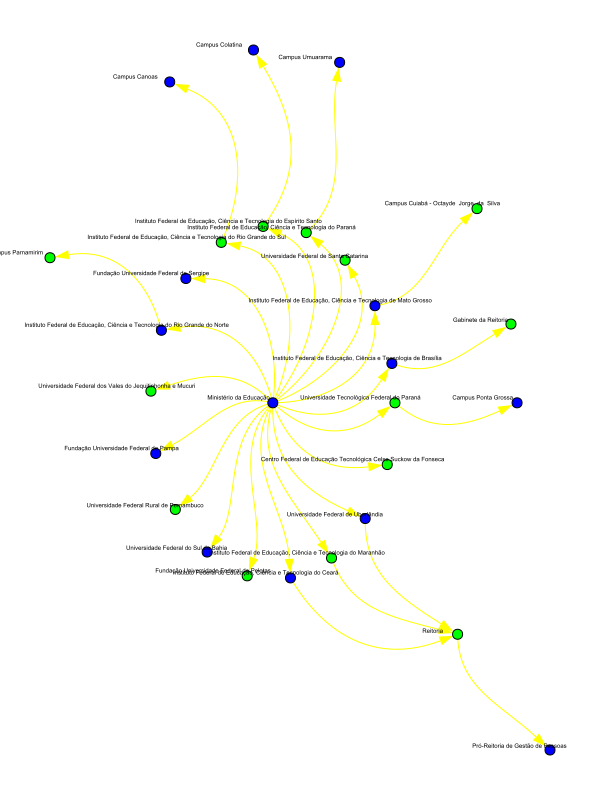

In [5]:
out_fig_name2019 = "grafo2019.eps"
grafo2019 = pickle.load(open("grafo2019.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (600,800)
visual_style["margin"] = 50
visual_style["vertex_color"] = ['blue','green']
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 10
visual_style["vertex_label_size"] = 6
visual_style["vertex_label_dist"] = 3
visual_style["vertex_label_angle"] = 3
visual_style["edge_curved"] = True
visual_style["edge_width"]=[1]
visual_style["frame"]=True
visual_style["layout"] = grafo2019.layout_reingold_tilford_circular()
print(grafo2019.summary())
plot(grafo2019, out_fig_name2019, **visual_style)

IGRAPH DN-- 30 29 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), peso (v), tempo_medio (v), data_inicio (e), data_termino (e), peso (e), tempo_medio (e)


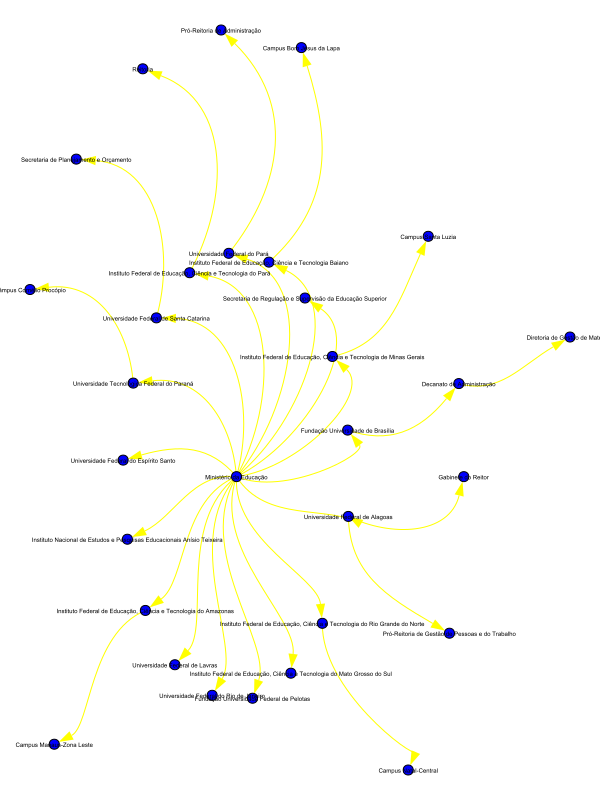

In [9]:
out_fig_name2020 = "grafo2020.eps"
grafo2020 = pickle.load(open("grafo2020.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (600,800)
visual_style["margin"] = 30
visual_style["vertex_color"] = 'blue'
visual_style["vertex_label_dist"] = 0
visual_style["vertex_label_angle"] = 45
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 10
visual_style["vertex_label_size"] = 6
visual_style["edge_curved"] = True
visual_style["layout"] = grafo2020.layout_reingold_tilford_circular()
print(grafo2020.summary())
plot(grafo2020, out_fig_name2020, **visual_style)

IGRAPH DN-- 24 27 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), peso (v), tempo_medio (v), data_inicio (e), data_termino (e), peso (e), tempo_medio (e)


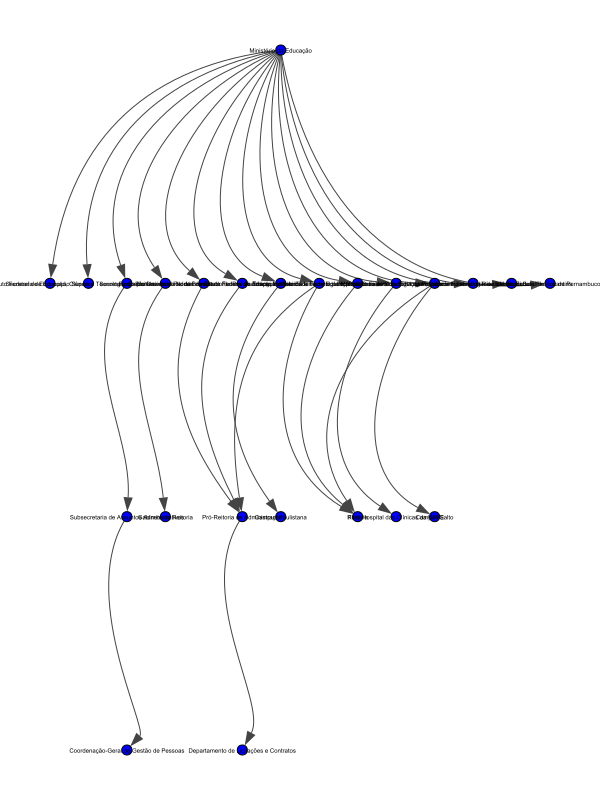

In [7]:
out_fig_name2021 = "grafo2021.eps"
grafo2021 = pickle.load(open("grafo2021.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (600,800)
visual_style["margin"] = 50
visual_style["vertex_color"] = 'blue'
visual_style["vertex_size"] = 10
visual_style["vertex_label_size"] = 6
visual_style["edge_curved"] = True
visual_style["layout"] = grafo2021.layout_sugiyama()
print(grafo2021.summary())
plot(grafo2021, out_fig_name2021, ** visual_style)

IGRAPH DN-- 26 28 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), peso (v), tempo_medio (v), data_inicio (e), data_termino (e), peso (e), tempo_medio (e)


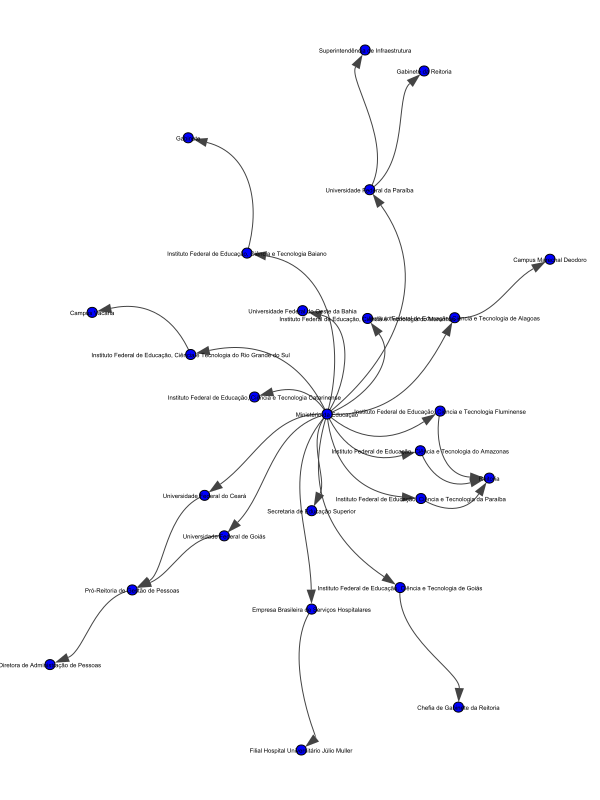

In [8]:
out_fig_name2022 = "grafo2022.eps"
grafo2022 = pickle.load(open("grafo2022.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (600,800)
visual_style["margin"] = 50
visual_style["vertex_color"] = 'blue'
visual_style["vertex_size"] = 10
visual_style["vertex_label_size"] = 6
visual_style["edge_curved"] = True
print(grafo2022.summary())
plot(grafo2022, out_fig_name2022, **visual_style)

### 